<a href="https://colab.research.google.com/github/ashu20031994/Intro-to-Deep-Learning-using-Keras/blob/main/5_CNN_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from tensorflow.keras.datasets import cifar10

In [26]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:
x_train.shape

(50000, 32, 32, 3)

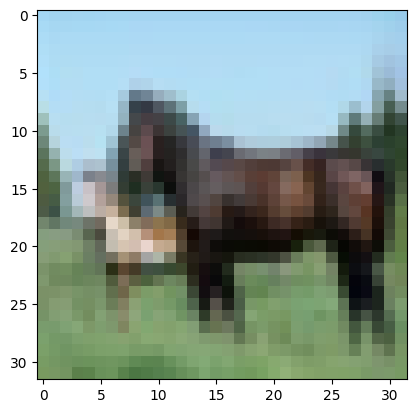

In [28]:
plt.imshow(x_train[12])

In [29]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [30]:
x_train = x_train/255
x_test = x_test/255

In [31]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [32]:
y_train[0]

array([6], dtype=uint8)

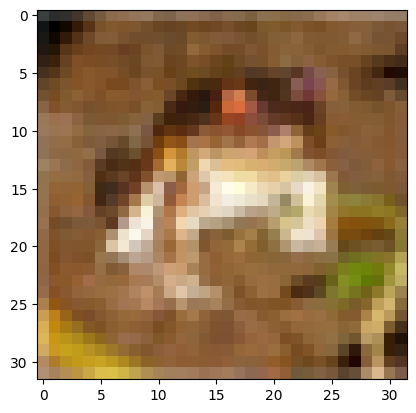

In [33]:
plt.imshow(x_train[0])

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [35]:
model = Sequential()

# convolution layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

# convolution layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics='accuracy')

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [38]:
model.fit(x_train, y_cat_train, epochs=15,
          validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4840 - accuracy: 0.4632 - val_loss: 1.2995 - val_accuracy: 0.5374
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1469 - accuracy: 0.5952 - val_loss: 1.1183 - val_accuracy: 0.6122
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9975 - accuracy: 0.6489 - val_loss: 1.0410 - val_accuracy: 0.6356
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8825 - accuracy: 0.6925 - val_loss: 0.9560 - val_accuracy: 0.6666
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7919 - accuracy: 0.7241 - val_loss: 0.9322 - val_accuracy: 0.6865
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7155 - accuracy: 0.7496 - val_loss: 0.9354 - val_accuracy: 0.6848
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6362 - accuracy: 0.7761 - val_loss: 0.9977 - val_accur

In [39]:
metrics = pd.DataFrame(model.history.history)

In [40]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.483983,0.46324,1.299489,0.5374
1,1.146943,0.59524,1.118283,0.6122
2,0.997524,0.64894,1.041032,0.6356
3,0.882492,0.69252,0.956043,0.6666
4,0.791928,0.72408,0.932232,0.6865
5,0.715532,0.74962,0.935410,0.6848
6,0.636229,0.77610,0.997729,0.6771


In [41]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

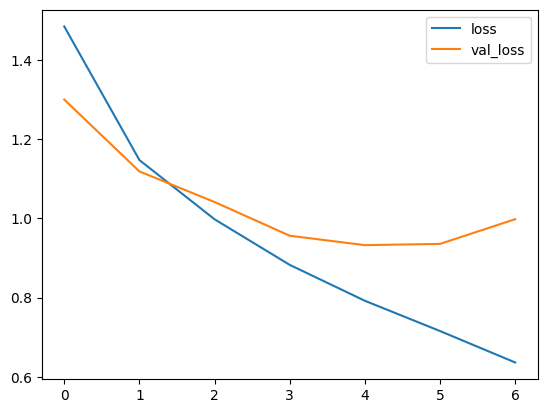

In [42]:
metrics[['loss','val_loss']].plot()

<Axes: >

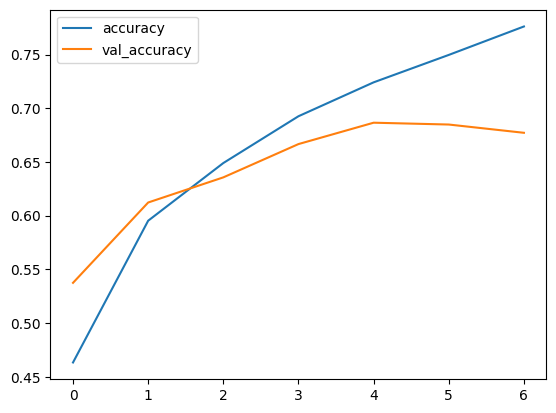

In [43]:
metrics[['accuracy','val_accuracy']].plot()

In [44]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9977294206619263, 0.6771000027656555]

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1000
           1       0.77      0.82      0.79      1000
           2       0.63      0.46      0.53      1000
           3       0.57      0.41      0.47      1000
           4       0.55      0.69      0.61      1000
           5       0.54      0.62      0.58      1000
           6       0.68      0.82      0.75      1000
           7       0.74      0.70      0.72      1000
           8       0.85      0.75      0.80      1000
           9       0.70      0.81      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



In [49]:
print(confusion_matrix(y_test, predictions))

[[692  43  47   7  43  13  20  10  60  65]
 [ 13 819   3   5   5   8  21   4  14 108]
 [ 58  14 460  52 164  94  95  33  10  20]
 [ 12  15  54 407 104 235  86  47  13  27]
 [ 14   4  37  49 689  45  66  76   9  11]
 [  8   9  55 110  82 621  44  47   7  17]
 [  1   7  18  47  54  27 822   7   3  14]
 [ 13   8  27  17  90  82  22 696   2  43]
 [ 60  63  15  15  18  10  11   7 753  48]
 [ 23  79  16   6   5  15  17   8  19 812]]


<Axes: >

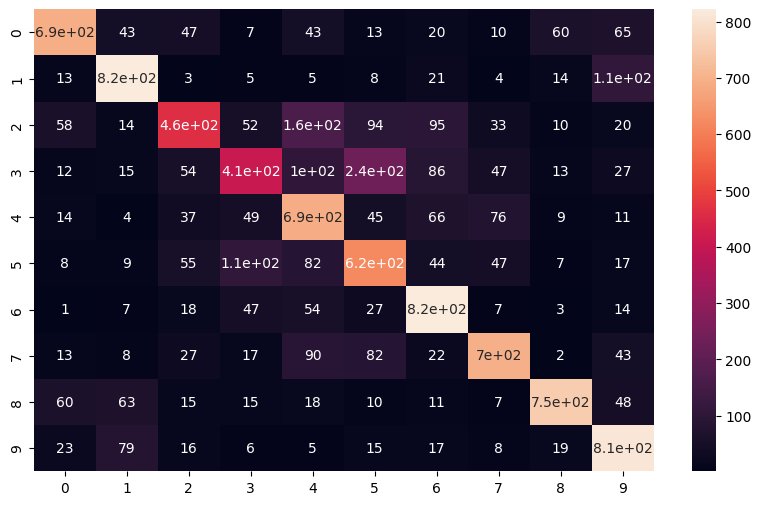

In [52]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

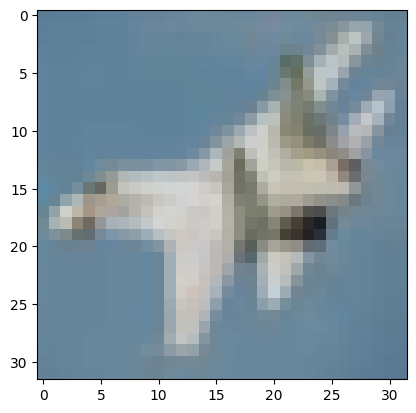

In [53]:
my_image = x_test[10]
plt.imshow(my_image)

In [54]:
y_test[10]

array([0], dtype=uint8)

In [58]:
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

1/1 [==============================] - 0s 207ms/step


0

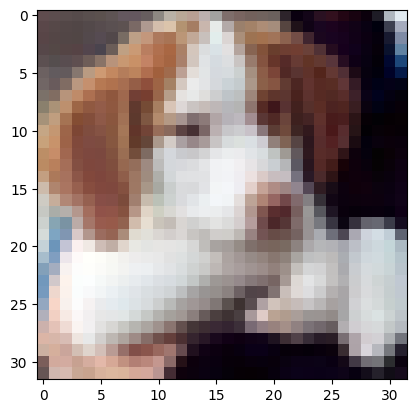

In [59]:
my_image = x_test[16]
plt.imshow(my_image)

In [60]:
y_test[16]

array([5], dtype=uint8)

In [61]:
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

1/1 [==============================] - 0s 27ms/step


5